# TP 1 : Time series withoud trend nor seasonality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\hp\AppData\Local\Temp\ipykernel_4816\3610919214.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the data:
huron= pd.read_csv('Lakehuron.csv', index_col=0)
huron.index = pd.to_datetime(huron.index)
# the parameter index_col = 0 means that the first column of the datafile will be used to index the rows
# the second line of command transforms the index column (with dates) into a DateTime format (format to manage dates in Python)

In [3]:
# examine the loaded data: 
huron

,Level
1891-01-31,579.14
1892-01-31,579.16
1893-01-31,579.55
1894-01-31,579.67
1895-01-31,578.44
...,...
1968-01-31,578.52
1969-01-31,579.74
1970-01-31,579.31
1971-01-31,579.89


In [4]:
huron.shape

(82, 1)

In [5]:
#Pour trouver le nombre de ligne, le nombre de colonne et le nombre de point d'une serie chronologique on utilise "nameOfData.shape"
# Si c'est une trame de données :
nombre_lignes, nombre_colonnes = huron.shape
print(f"Nombre de lignes : {nombre_lignes}")
print(f"Nombre de colonnes : {nombre_colonnes}")

# Si huron est une serie chronologique :
nombre_points = huron.shape[0]
print(f"Nombre de points dans la série chronologique : {nombre_points}")

# Afficher les premières lignes du DataFrame pour examiner la colonne 
#print(df.head())

Nombre de lignes : 82
Nombre de colonnes : 1
Nombre de points dans la série chronologique : 82


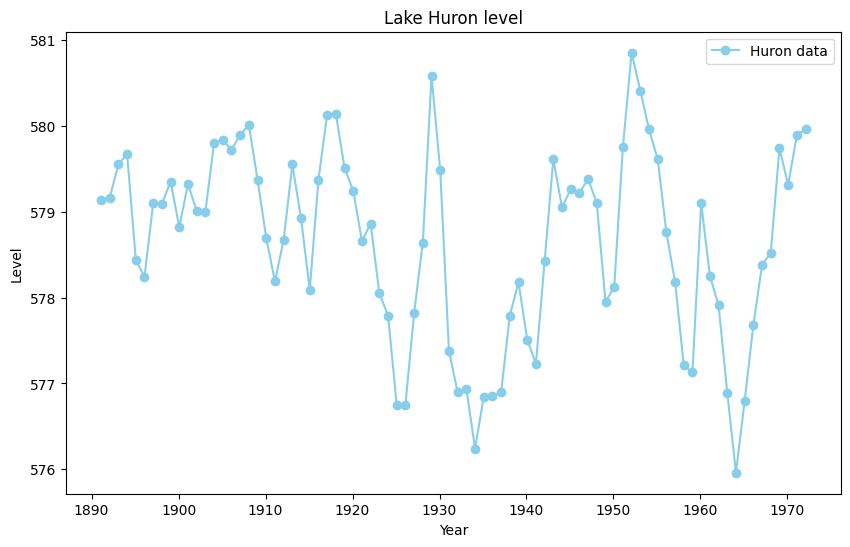

In [6]:
# We will now plot this time series:
plt.figure(figsize=(10, 6)) # creates a figure with the desired size
plt.plot(huron, marker = 'o', color = 'skyblue', label = 'Huron data') # plots the data in the variable huron (by default, index is used for the x-axis and the values for the y-axis).
# marker is used to define how the points will be depicted (you can try something else). You can also change
# the color. The label is the name that you give to the curve (this name will be used in the legend)
plt.title("Lake Huron level") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

In [7]:
!pip install statsmodels

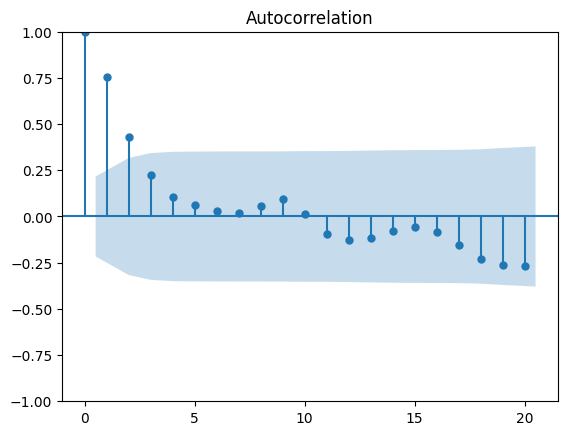

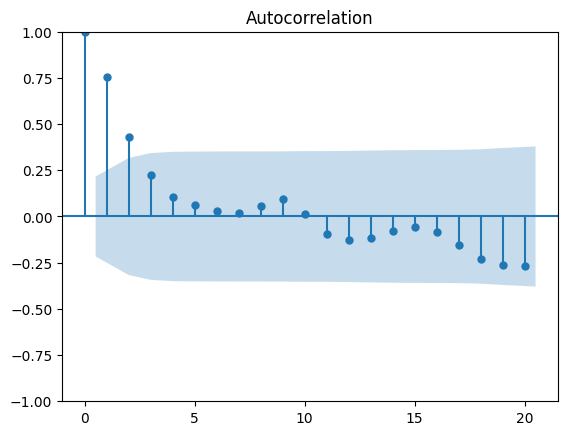

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(huron)

In [9]:
huron_train = huron.iloc[:71,:] # ':71' means rows from the first up to 71 excluded (so 0,1,2,3,...,70) and ':' after the coma means all columns of the dataframe (just one here)
huron_valid = huron.iloc[71:,:] # '71:' means rows from 71 (included) up to the end

# More generally, if df is a dataframe, 
# the command df.iloc[i,j] gets the value at the row number i (starting from 0) and column j (starting from 0)
# the command df.loc[i,j]  gets the value at the row whose index is i and column whose index is j
# with huron for instance, I can get the value at the year 1900 by
# huron.loc['1900-01-31', 'Level']


In [10]:
huron_train.shape

(71, 1)

In [11]:
huron_valid.shape

(11, 1)

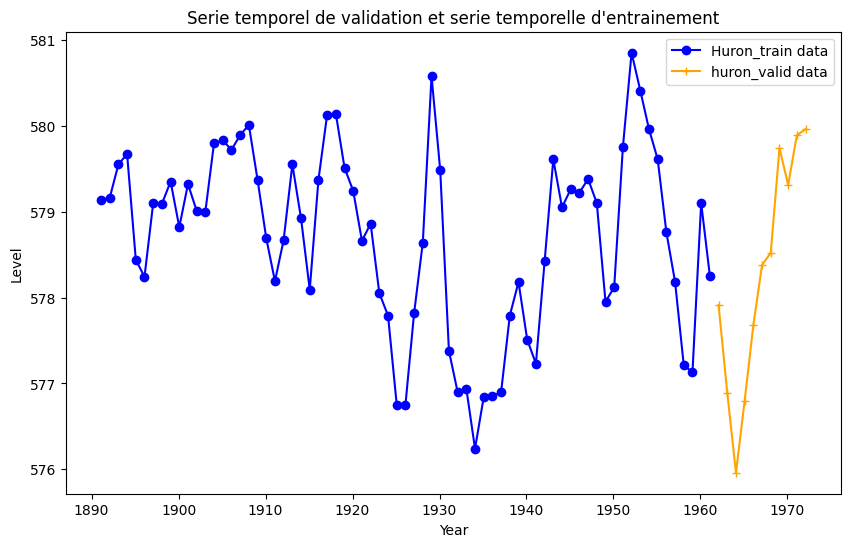

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(huron_train, marker='o', color = 'blue', label = 'Huron_train data')
plt.plot(huron_valid, marker='+', color= 'orange', label= 'huron_valid data')

plt.title("Serie temporel de validation et serie temporelle d'entrainement") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') 


## First method : prediction is the last observed value

In [15]:
huron_train

,Level
1891-01-31,579.14
1892-01-31,579.16
1893-01-31,579.55
1894-01-31,579.67
1895-01-31,578.44
...,...
1957-01-31,578.18
1958-01-31,577.21
1959-01-31,577.13
1960-01-31,579.10


In [16]:
huron_valid

,Level
1962-01-31,577.91
1963-01-31,576.89
1964-01-31,575.96
1965-01-31,576.80
1966-01-31,577.68
1967-01-31,578.38
1968-01-31,578.52
1969-01-31,579.74
1970-01-31,579.31
1971-01-31,579.89


In [45]:
pred_lp = np.repeat(huron_train.iloc[70,0], 11, axis=0)

In [49]:
pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])


,Level
1962-01-31,578.25
1963-01-31,578.25
1964-01-31,578.25
1965-01-31,578.25
1966-01-31,578.25
1967-01-31,578.25
1968-01-31,578.25
1969-01-31,578.25
1970-01-31,578.25
1971-01-31,578.25


In [50]:
pred_lp = pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])

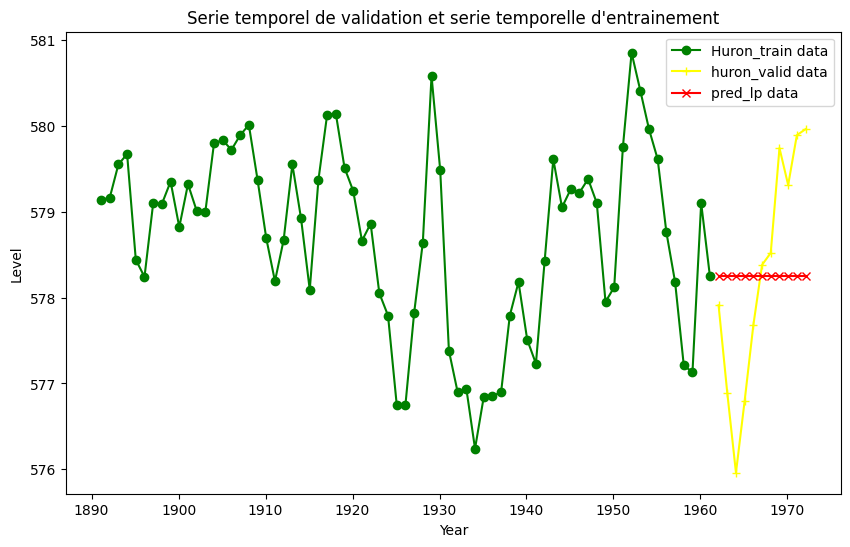

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(huron_train, marker='o', color = 'green', label = 'Huron_train data')
plt.plot(huron_valid, marker='+', color= 'yellow', label= 'huron_valid data')
plt.plot(pred_lp, marker ='x', color = 'red', label = 'pred_lp data')

plt.title("Serie temporel de validation et serie temporelle d'entrainement") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') 


In [54]:
R_squared = (huron_valid.iloc[0,0] - pred_lp.iloc[0,0])**2

0.11560000000002164

In [59]:
np.mean((pred_lp - huron_valid)**2)
# here we compare the predictions in pred_lp with the true values (in huron_valid) with a substraction, square the errors
# and get the mean (with np.mean)

1.6985363636363688

## Second method : prediction is the mean of all past observed values

In [66]:
pred_l = np.mean(huron_train.iloc[:,0])
pred_l

578.7108450704226

In [88]:
huron_all = np.concatenate((huron_train, huron_valid))
for i in range(71,82):
    moyenne = np.mean(huron_all.iloc[:i,0])
    huron_all[i+1, 0] = moyenne 
huron_all


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [69]:
huron_train.append('pred_l')
np.mean(huron_train.iloc[:,0])

AttributeError: 'DataFrame' object has no attribute 'append'

## Simple exponential smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


ses_model = SimpleExpSmoothing(huron_train,initialization_method='known', initial_level=579)
ses_model = ses_model.fit(smoothing_level=0.5)


# Here I ask to use alpha = 0.5 (smoothing level) and xhat_0 = 579 (prediction of the value x_0, initial level)
# We will see a bit later how to ask the algorithm to search for the best values of these parameters
ses_model.summary()

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  % freq, ValueWarning)
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1103: FutureWarning: Setting initial values during fit is deprecated and will be removed after 0.13. These should be set during model initialization.
  FutureWarning,
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:830: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  warnings.warn(message, EstimationWarning)


Dep. Variable:,Level,No. Observations:,71
Model:,SimpleExpSmoothing,SSE,51.923
Optimized:,False,AIC,-18.217
Trend:,None,BIC,-13.692
Seasonal:,None,AICC,-17.611
Seasonal Periods:,None,Date:,"Sat, 23 Jan 2021"
Box-Cox:,False,Time:,16:15:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,579.00000,l.0,False


In [ ]:
ses_model.fittedvalues

1891-01-31    579.000000
1892-01-31    579.070000
1893-01-31    579.115000
1894-01-31    579.332500
1895-01-31    579.501250
                 ...    
1957-01-31    579.299895
1958-01-31    578.739947
1959-01-31    577.974974
1960-01-31    577.552487
1961-01-31    578.326243
Length: 71, dtype: float64

In [ ]:
ses_model_2 = SimpleExpSmoothing(huron_train).fit()
# here we do not put any desired values for alpha and the initial level which means that the algorithm will search for the best ones
ses_model_2.summary()

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  % freq, ValueWarning)
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Dep. Variable:,Level,No. Observations:,71
Model:,SimpleExpSmoothing,SSE,41.330
Optimized:,True,AIC,-34.418
Trend:,None,BIC,-29.893
Seasonal:,None,AICC,-33.812
Seasonal Periods:,None,Date:,"Sat, 23 Jan 2021"
Box-Cox:,False,Time:,16:18:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,579.14022,l.0,True


In [ ]:
print('Alpha :',ses_model_2.params['smoothing_level'])
print('xhat_0 :', ses_model_2.params['initial_level'])

Alpha : 0.9999999850983017
xhat_0 : 579.1402183914184


In [ ]:
ses_model_2.forecast(10)

1962-01-31    578.25
1963-01-31    578.25
1964-01-31    578.25
1965-01-31    578.25
1966-01-31    578.25
1967-01-31    578.25
1968-01-31    578.25
1969-01-31    578.25
1970-01-31    578.25
1971-01-31    578.25
Freq: A-JAN, dtype: float64

## Auto-regressive models

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(huron_train, lags = 1, trend = 'c').fit()
ar_model.summary()
# the parameter lags is used to define the order of the AR model you want
# trend = 'c' means that we want a constant (beta_0) in the model

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  % freq, ValueWarning)
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Level   No. Observations:                   71
Model:                     AutoReg(1)   Log Likelihood                 -76.025
Method:               Conditional MLE   S.D. of innovations              0.717
Date:                Sun, 24 Jan 2021   AIC                             -0.580
Time:                        10:04:25   BIC                             -0.484
Sample:                    01-31-1892   HQIC                            -0.542
                         - 01-31-1961                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.8478     46.463      3.225      0.001      58.782     240.913
Level.L1       0.7410      0.080      9.230      0.000       0.584       0.898
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3494           +0.0000j            1.3494            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
ar_model.params

intercept    149.847758
Level.L1       0.741047
dtype: float64

In [ ]:
ar_model.forecast(1) # 1 here means 1 time instant after the last value of the training data

1962-01-31    578.358328
Freq: A-JAN, dtype: float64

In [ ]:
ar_model.bic
# The lower is this value, the better is the fit of the model to the training data

-0.48366674531703335